In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('v1.csv').sort_values(by=['acc', 'average_res_time']).iloc[::-1]

In [3]:
df

,id,group,acc,average_res_time
11,m,er,100.00,406.48
2,ja,vi,99.54,460.73
3,jingni,vi,98.00,466.00
6,flex,vi,98.00,452.00
5,mar,vi,97.00,582.00
14,xd,er,97.00,386.00
4,lwf,vi,97.00,365.00
7,def,er,96.00,502.00
8,fad,er,96.00,483.00
12,new,er,93.00,430.00


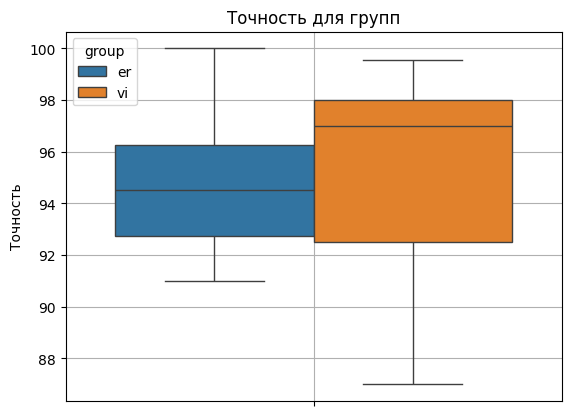

In [4]:
sns.boxplot(data=df,
            y='acc',
            hue='group')
plt.ylabel('Точность')
plt.title('Точность для групп')
plt.grid()
plt.show()

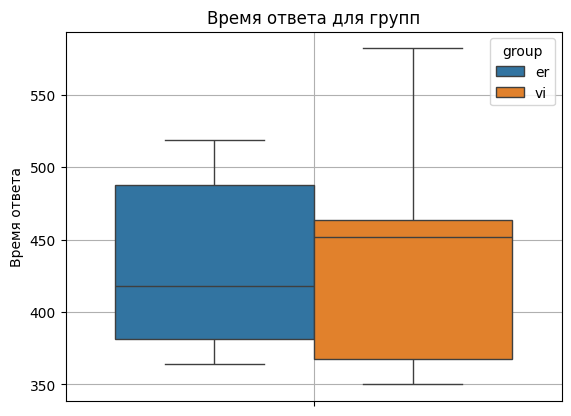

In [5]:
sns.boxplot(data=df,
            y='average_res_time',
            hue='group')
plt.ylabel('Время ответа')
plt.title('Время ответа для групп')
plt.grid()
plt.show()

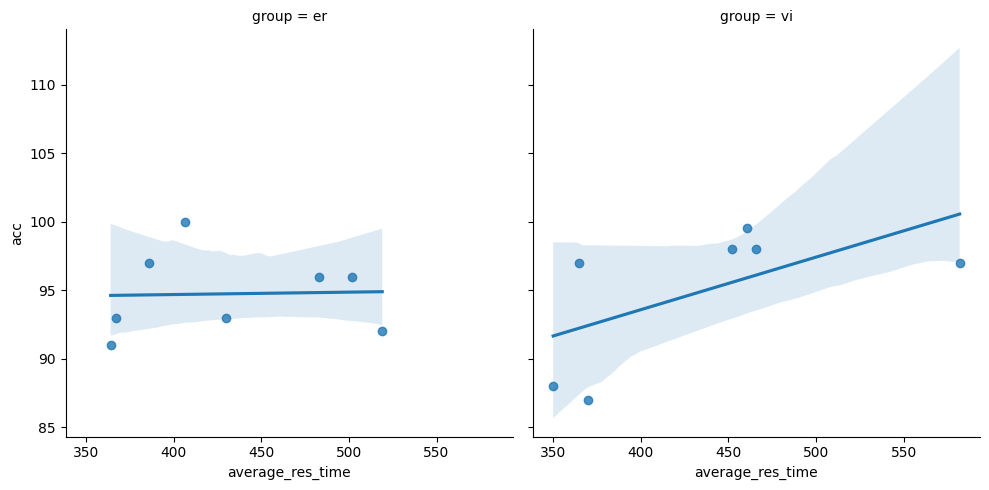

In [6]:
sns.lmplot(data=df,
           x='average_res_time',
           y='acc',
           col='group')

plt.show()

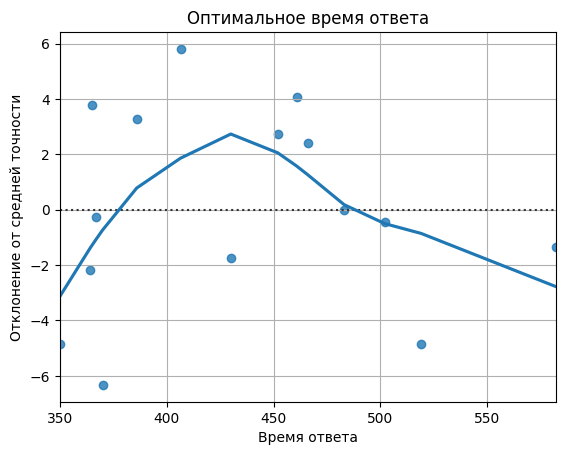

In [7]:
sns.residplot(data=df,
              x='average_res_time',
              y='acc',
              lowess=True)

plt.xlabel('Время ответа')
plt.ylabel('Отклонение от средней точности')
plt.title('Оптимальное время ответа')
plt.grid()
plt.show()
plt.show()

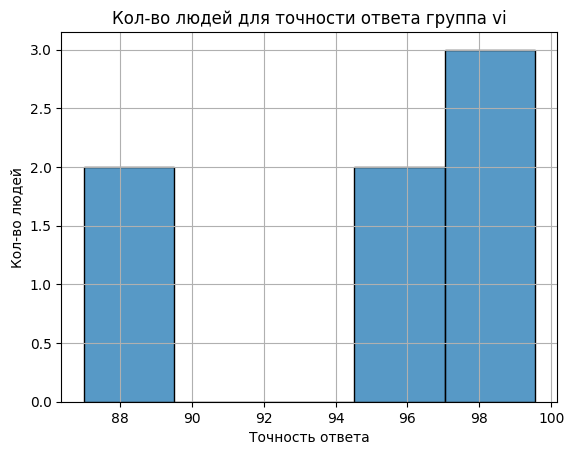

In [15]:
sns.histplot(data=df[df.group == 'vi'],
             x='acc',
             bins=5)
plt.xlabel('Точность ответа')
plt.ylabel('Кол-во людей')
plt.title('Кол-во людей для точности ответа группа vi')
plt.grid()
plt.show()
plt.show()

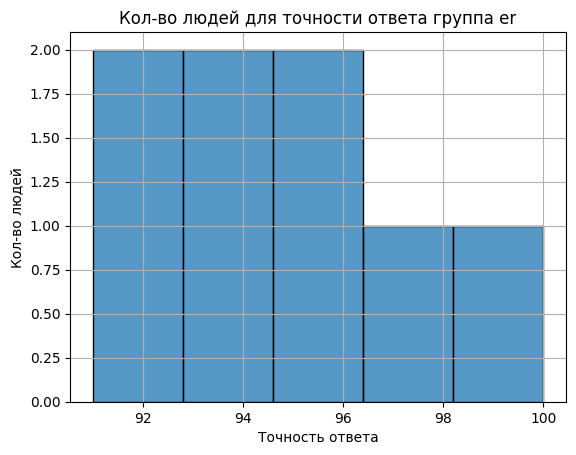

In [16]:
sns.histplot(data=df[df.group == 'er'],
             x='acc',
             bins=5)
plt.xlabel('Точность ответа')
plt.ylabel('Кол-во людей')
plt.title('Кол-во людей для точности ответа группа er')
plt.grid()
plt.show()
plt.show()

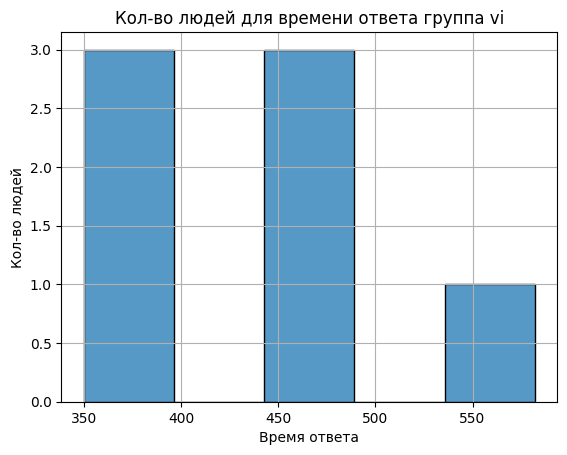

In [18]:
sns.histplot(data=df[df.group == 'vi'],
             x='average_res_time',
             bins=5)
plt.xlabel('Время ответа')
plt.ylabel('Кол-во людей')
plt.title('Кол-во людей для времени ответа группа vi')
plt.grid()
plt.show()
plt.show()

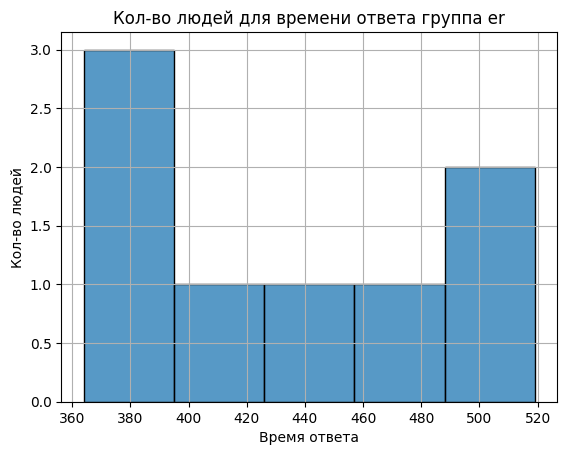

In [19]:
sns.histplot(data=df[df.group == 'er'],
             x='average_res_time',
             bins=5)
plt.xlabel('Время ответа')
plt.ylabel('Кол-во людей')
plt.title('Кол-во людей для времени ответа группа er')
plt.grid()
plt.show()
plt.show()

In [28]:
shapiro_vi_acc = shapiro(df[df.group == 'vi'].acc)
shapiro_vi_acc

ShapiroResult(statistic=0.7561803839787063, pvalue=0.014715095226353746)

In [29]:
shapiro_er_acc = shapiro(df[df.group == 'er'].acc)
shapiro_er_acc

ShapiroResult(statistic=0.9390059749151229, pvalue=0.6013270398385859)

In [30]:
shapiro_vi_res = shapiro(df[df.group == 'vi'].average_res_time)
shapiro_vi_res

ShapiroResult(statistic=0.8861788766103855, pvalue=0.25531828009384094)

In [31]:
shapiro_er_res = shapiro(df[df.group == 'er'].average_res_time)
shapiro_er_res

ShapiroResult(statistic=0.8978223053756125, pvalue=0.27615824703772496)

In [35]:
# Выбираем тест в зависимости от результатов проверки нормальности
if shapiro_er_acc.pvalue > 0.05 and shapiro_vi_acc.pvalue > 0.05:
    # Если оба распределения нормальные, используем t-тест
    t_statistic, p_value = stats.ttest_ind(df[df.group == 'er'].acc, df[df.group == 'vi'].acc)
    print(f"t-test: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")
    test_name = 't-test'

else:
    # Если хотя бы одно распределение не нормальное, используем U-тест Манна-Уитни
    u_statistic, p_value = stats.mannwhitneyu(df[df.group == 'er'].acc, df[df.group == 'vi'].acc)
    print(f"Mann-Whitney U test: U-statistic = {u_statistic:.2f}, p-value = {p_value:.3f}")
    test_name = "Mann-Whitney U test"


Mann-Whitney U test: U-statistic = 22.00, p-value = 0.522
